In [158]:
#Cargar las librerías necesarias
import pandas as pd # Manejo y análisis de estructura de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics 
from sklearn.model_selection import train_test_split # Dividir el dataset en dos partes
from sklearn.tree import DecisionTreeClassifier, plot_tree # DecisionTreeClassifier (entrena y clasifica) plot_tree (Dibuja el árbol resultante)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [160]:
# Lectura de datos en python y lo cargamos en la variable Datos
data = pd.read_csv("D:/Universidad/ANALISIS DE DATOS/winequality-red.csv")

In [162]:
#Realizmos lectura de los Datos para el analisis exploratorio

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [164]:
data.shape

(1599, 12)

In [166]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [168]:
data.isna() .sum() # Verificamos si hay valores nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

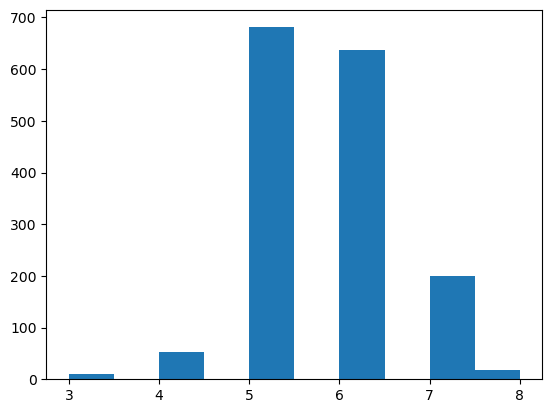

In [170]:
plt.hist(data.quality)

En el siguiente gráfico podemos observar la relación de producción del vino referente a su calidad.

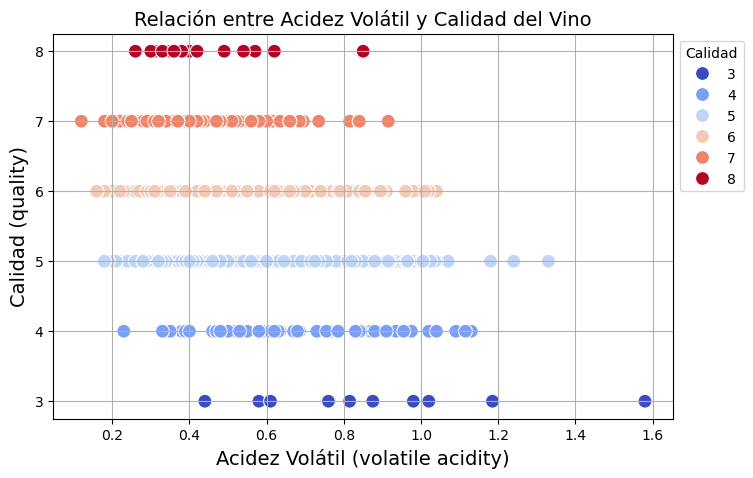

In [173]:
# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["volatile acidity"], y=data["quality"], hue=data["quality"], palette='coolwarm', s=100)
plt.title("Relación entre Acidez Volátil y Calidad del Vino", fontsize=14)
plt.xlabel("Acidez Volátil (volatile acidity)", fontsize=14)
plt.ylabel("Calidad (quality)", fontsize=14)
plt.legend(title="Calidad", bbox_to_anchor=(1.0, 1), loc='upper left')
plt.grid(True)
plt.show()

En esta grafica podemos observar la relación entre la acidez volátil y la calidad del vino, teniendo en cuenta que la acidez volátil normal
en un vino, está en un rango entre 0,3 a 0,6 gramos por litro. 

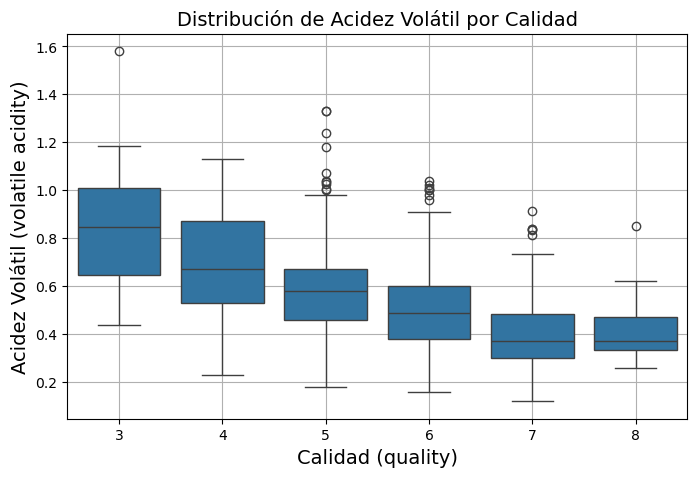

In [176]:
# Gráfico de caja (boxplot) para calidad
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["quality"], y=data["volatile acidity"])
plt.title("Distribución de Acidez Volátil por Calidad", fontsize=14)
plt.xlabel("Calidad (quality)", fontsize=14)
plt.ylabel("Acidez Volátil (volatile acidity)", fontsize=14)
plt.grid(True)
plt.show()

En este gráfico podemos observar la distribución de valores de acidez volátil para los diferentes niveles de calidad del vino. 
Permitiéndonos de este modo observar valores atípicos representados por círculos en la gráfica.

In [179]:
# Separar las características (X) y la variable objetivo (y)
x = data.drop("quality", axis=1)  # Todas las variables menos "quality"
y = data["quality"]  # Variable objetivo

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())


quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64
quality
5    136
6    128
7     40
4     11
8      3
3      2
Name: count, dtype: int64


In [181]:
# Iterar sobre las columnas y entrenar el modelo
model_col = []
for col in cols:
    model_col.append(col)  # Agregar la columna actual al modelo
    model = RandomForestClassifier(random_state=0)  # Crear el modelo

    # Entrenar usando las columnas seleccionadas en el conjunto de entrenamiento
    model.fit(x_train[model_col], y_train)

    # Realizar predicciones en el conjunto de prueba usando las mismas columnas
    y_pred = model.predict(x_test[model_col])

    # Calcular precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir precisión
    print(f"Precisión con {model_col}: {accuracy:.2f}")

Precisión con ['fixed acidity']: 0.43
Precisión con ['fixed acidity', 'volatile acidity']: 0.57
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.58
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.60
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.60
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.63
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.64
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.67
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']: 0.64
Precisión con ['fixed acidit

In [183]:
tree = DecisionTreeClassifier()

In [185]:
arbol = tree.fit(x_train, y_train)

[Text(0.4373064852296275, 0.9772727272727273, 'x[10] <= 10.15\ngini = 0.643\nsamples = 1279\nvalue = [8.0, 42.0, 545.0, 510.0, 159.0, 15.0]'),
 Text(0.22847091706423786, 0.9318181818181818, 'x[9] <= 0.575\ngini = 0.507\nsamples = 634\nvalue = [4, 22, 403, 187, 17, 1]'),
 Text(0.3328887011469327, 0.9545454545454546, 'True  '),
 Text(0.08765842609994699, 0.8863636363636364, 'x[10] <= 9.75\ngini = 0.386\nsamples = 273\nvalue = [2.0, 13.0, 208.0, 48.0, 2.0, 0.0]'),
 Text(0.034986265722133876, 0.8409090909090909, 'x[10] <= 9.075\ngini = 0.321\nsamples = 193\nvalue = [2, 10, 157, 23, 1, 0]'),
 Text(0.012336754855187702, 0.7954545454545454, 'x[0] <= 8.15\ngini = 0.708\nsamples = 12\nvalue = [1, 3, 4, 4, 0, 0]'),
 Text(0.006168377427593851, 0.75, 'x[9] <= 0.515\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3, 0, 0, 0]'),
 Text(0.0030841887137969255, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.009252566141390776, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nv

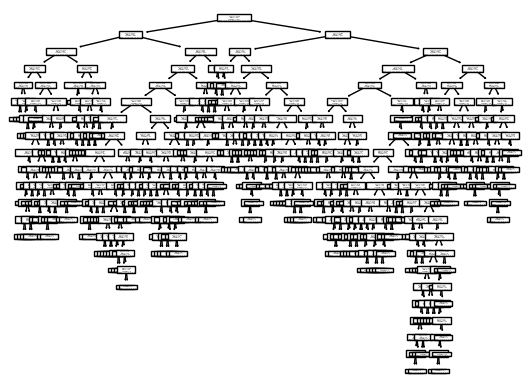

In [187]:
plot_tree(arbol)

En nuestro árbol de decisiones observamos las distintas divisiones para llegar a un valor concreto en cuanto a la calidad del vino.

In [196]:
predicciones = arbol.predict(x_test)

In [198]:
predicciones

array([7, 6, 4, 6, 5, 7, 6, 5, 6, 8, 4, 6, 5, 6, 5, 6, 6, 5, 7, 7, 6, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 5, 6, 6, 7, 5, 5, 7, 5, 5, 6, 5, 6, 6,
       6, 7, 7, 6, 5, 5, 5, 7, 5, 5, 6, 5, 4, 6, 5, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 7, 5, 5, 6, 7, 5, 5, 5, 5, 6, 4, 8, 7, 7, 7, 4, 6, 7, 7, 7, 6,
       5, 5, 5, 5, 7, 6, 4, 5, 7, 7, 7, 6, 4, 5, 6, 7, 7, 5, 5, 7, 5, 5,
       5, 7, 7, 6, 5, 7, 5, 4, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 8, 6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6,
       7, 5, 7, 8, 7, 5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 8, 5, 5,
       5, 5, 7, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 6, 5, 6, 7, 3, 5, 6, 7, 6,
       6, 4, 5, 5, 6, 7, 6, 7, 7, 6, 6, 5, 7, 7, 5, 6, 5, 7, 6, 5, 5, 5,
       5, 6, 5, 5, 7, 6, 7, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6,
       6, 6, 6, 5, 5, 7, 5, 6, 5, 6, 5, 5, 5, 7, 5,

In [206]:
# Generar una tabla cruzada entre valores reales y predicciones
tabla_cruzada = pd.crosstab(
    y_test,  # Valores reales de la variable objetivo
    predicciones,  # Valores predichos por el modelo
    rownames=["Actual"],  # Nombre para las filas
    colnames=["Predicciones"]  # Nombre para las columnas
)

print(tabla_cruzada)

Predicciones  3  4   5   6   7  8
Actual                           
3             0  1   1   0   0  0
4             1  2   5   3   0  0
5             0  3  92  35   6  0
6             0  3  29  75  19  2
7             0  1   3   8  26  2
8             0  0   1   1   0  1


In [208]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.6125

In [210]:
precision = precision_score(y_test, predicciones, average="weighted")
precision

0.6168504119830888

In [214]:
recall = recall_score(y_test, predicciones, average="weighted")
recall

0.6125

In [216]:
f1 = f1_score(y_test, predicciones, average="weighted")
f1

0.6132038356072766